<a href="https://colab.research.google.com/github/nicholauscjj/laughingcouscous/blob/main/Question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/nicholauscjj/laughingcouscous.git -q

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn import metrics
from laughingcouscous.draw import plot_gmm, plot_kmeans

In [ ]:
data = np.array([[2.25,3.47],
                 [4.71,3.60],
                 [3.17,4.96],
                 [2.32,1.63],
                 [2.31,2.09],
                 [1.14,2.11],
                 [1.90,0.97],
                 [1.76,0.84],
                 [5.02,3.02],
                 [5.74,3.84]])

init_weight = np.full(data.shape[1], 0.5)
indexing = np.arange(1,11)

In [ ]:
gmm = GaussianMixture(n_components=2, weights_init=init_weight, verbose=0)
gmm.fit(data)

GaussianMixture(n_components=2, weights_init=array([0.5, 0.5]))

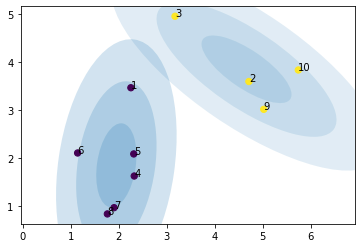

In [ ]:
plot_gmm(gmm, data, indexing)

In [ ]:
prediction = gmm.predict(data)

for i in range(data.shape[0]):
  print('Data {} belongs to class: {}'.format(i+1, int(prediction[i])))

Data 1 belongs to class: 0
Data 2 belongs to class: 1
Data 3 belongs to class: 1
Data 4 belongs to class: 0
Data 5 belongs to class: 0
Data 6 belongs to class: 0
Data 7 belongs to class: 0
Data 8 belongs to class: 0
Data 9 belongs to class: 1
Data 10 belongs to class: 1




---



In [ ]:
#assuming the ground truth is obtained as follows:

init_point = np.concatenate(([data[0]],[data[-1]]), axis=0)

kmeans = KMeans(n_clusters=2, n_init=1, init=init_point, verbose=0)
kmeans.fit(data)

KMeans(init=array([[2.25, 3.47],
       [5.74, 3.84]]), n_clusters=2, n_init=1)

In [ ]:
groundtruth = kmeans.predict(data)

In [ ]:
contingency_matrix = metrics.cluster.contingency_matrix(groundtruth, prediction)

purity_index = np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 
rand_index = metrics.rand_score(groundtruth, prediction)
print('purity index: {}, rand_index: {}'.format(purity_index, rand_index))

purity index: 1.0, rand_index: 1.0


In [ ]:
contingency_matrix

array([[6, 0],
       [0, 4]])

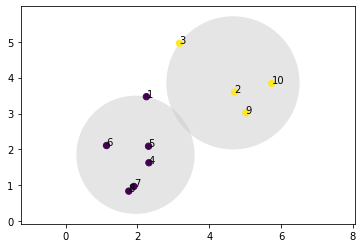

In [ ]:
plot_kmeans(kmeans, data, n_clusters=2)